In [1]:
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import networkx as nx
import json
import math
from random import random

In [2]:
def create_graph(filename):

    f = open(filename,'r')
    G = nx.MultiDiGraph()
    try:
        for l in f:
            msg = json.loads(l)
            for m in msg['mentions']:
                if 'userId' in m:
                    G.add_edge(msg['fromUser']['username'],m['screenName'])
                #end
            #end
        #end
    finally:
        f.close()
    #end
    
    return G
#end

In [3]:
G = create_graph('55fe873b0fc9f982beb13b83-messages.txt')

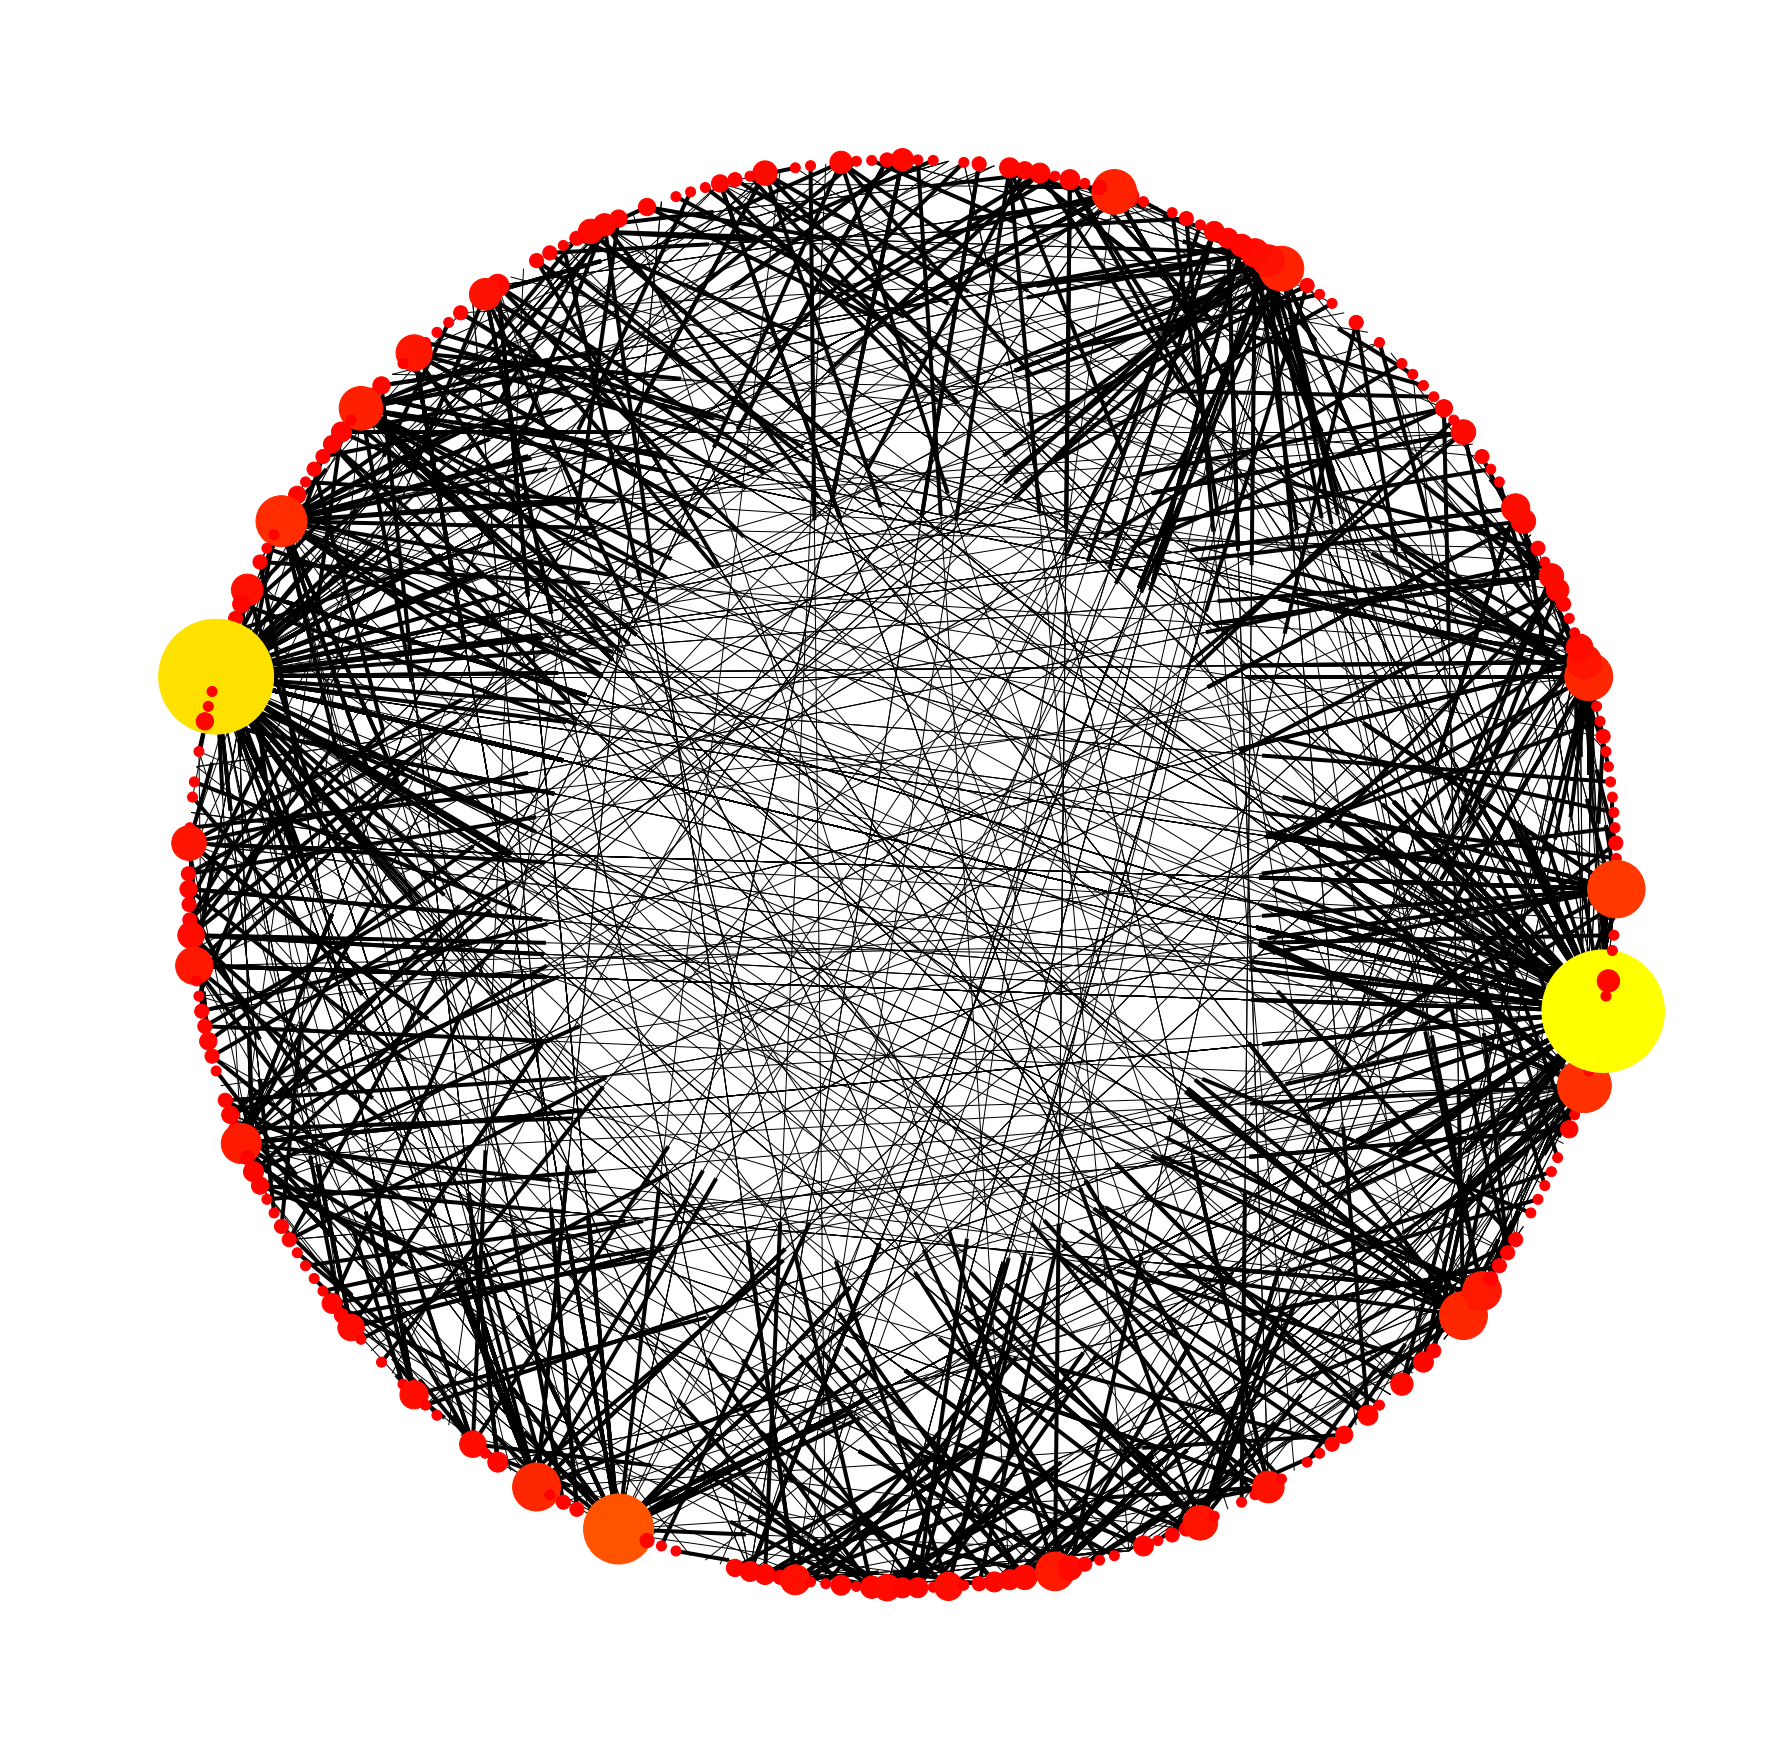

In [4]:
plt.figure(1,figsize=(24,24))
node_size = map(lambda x: 100*x[1],G.in_degree(G.nodes()))
nx.draw_circular(G,
                 node_size=node_size,
                 node_color=map(lambda x: (x[1]+10), G.in_degree(G.nodes())),
                 cmap=plt.cm.autumn)
plt.show()

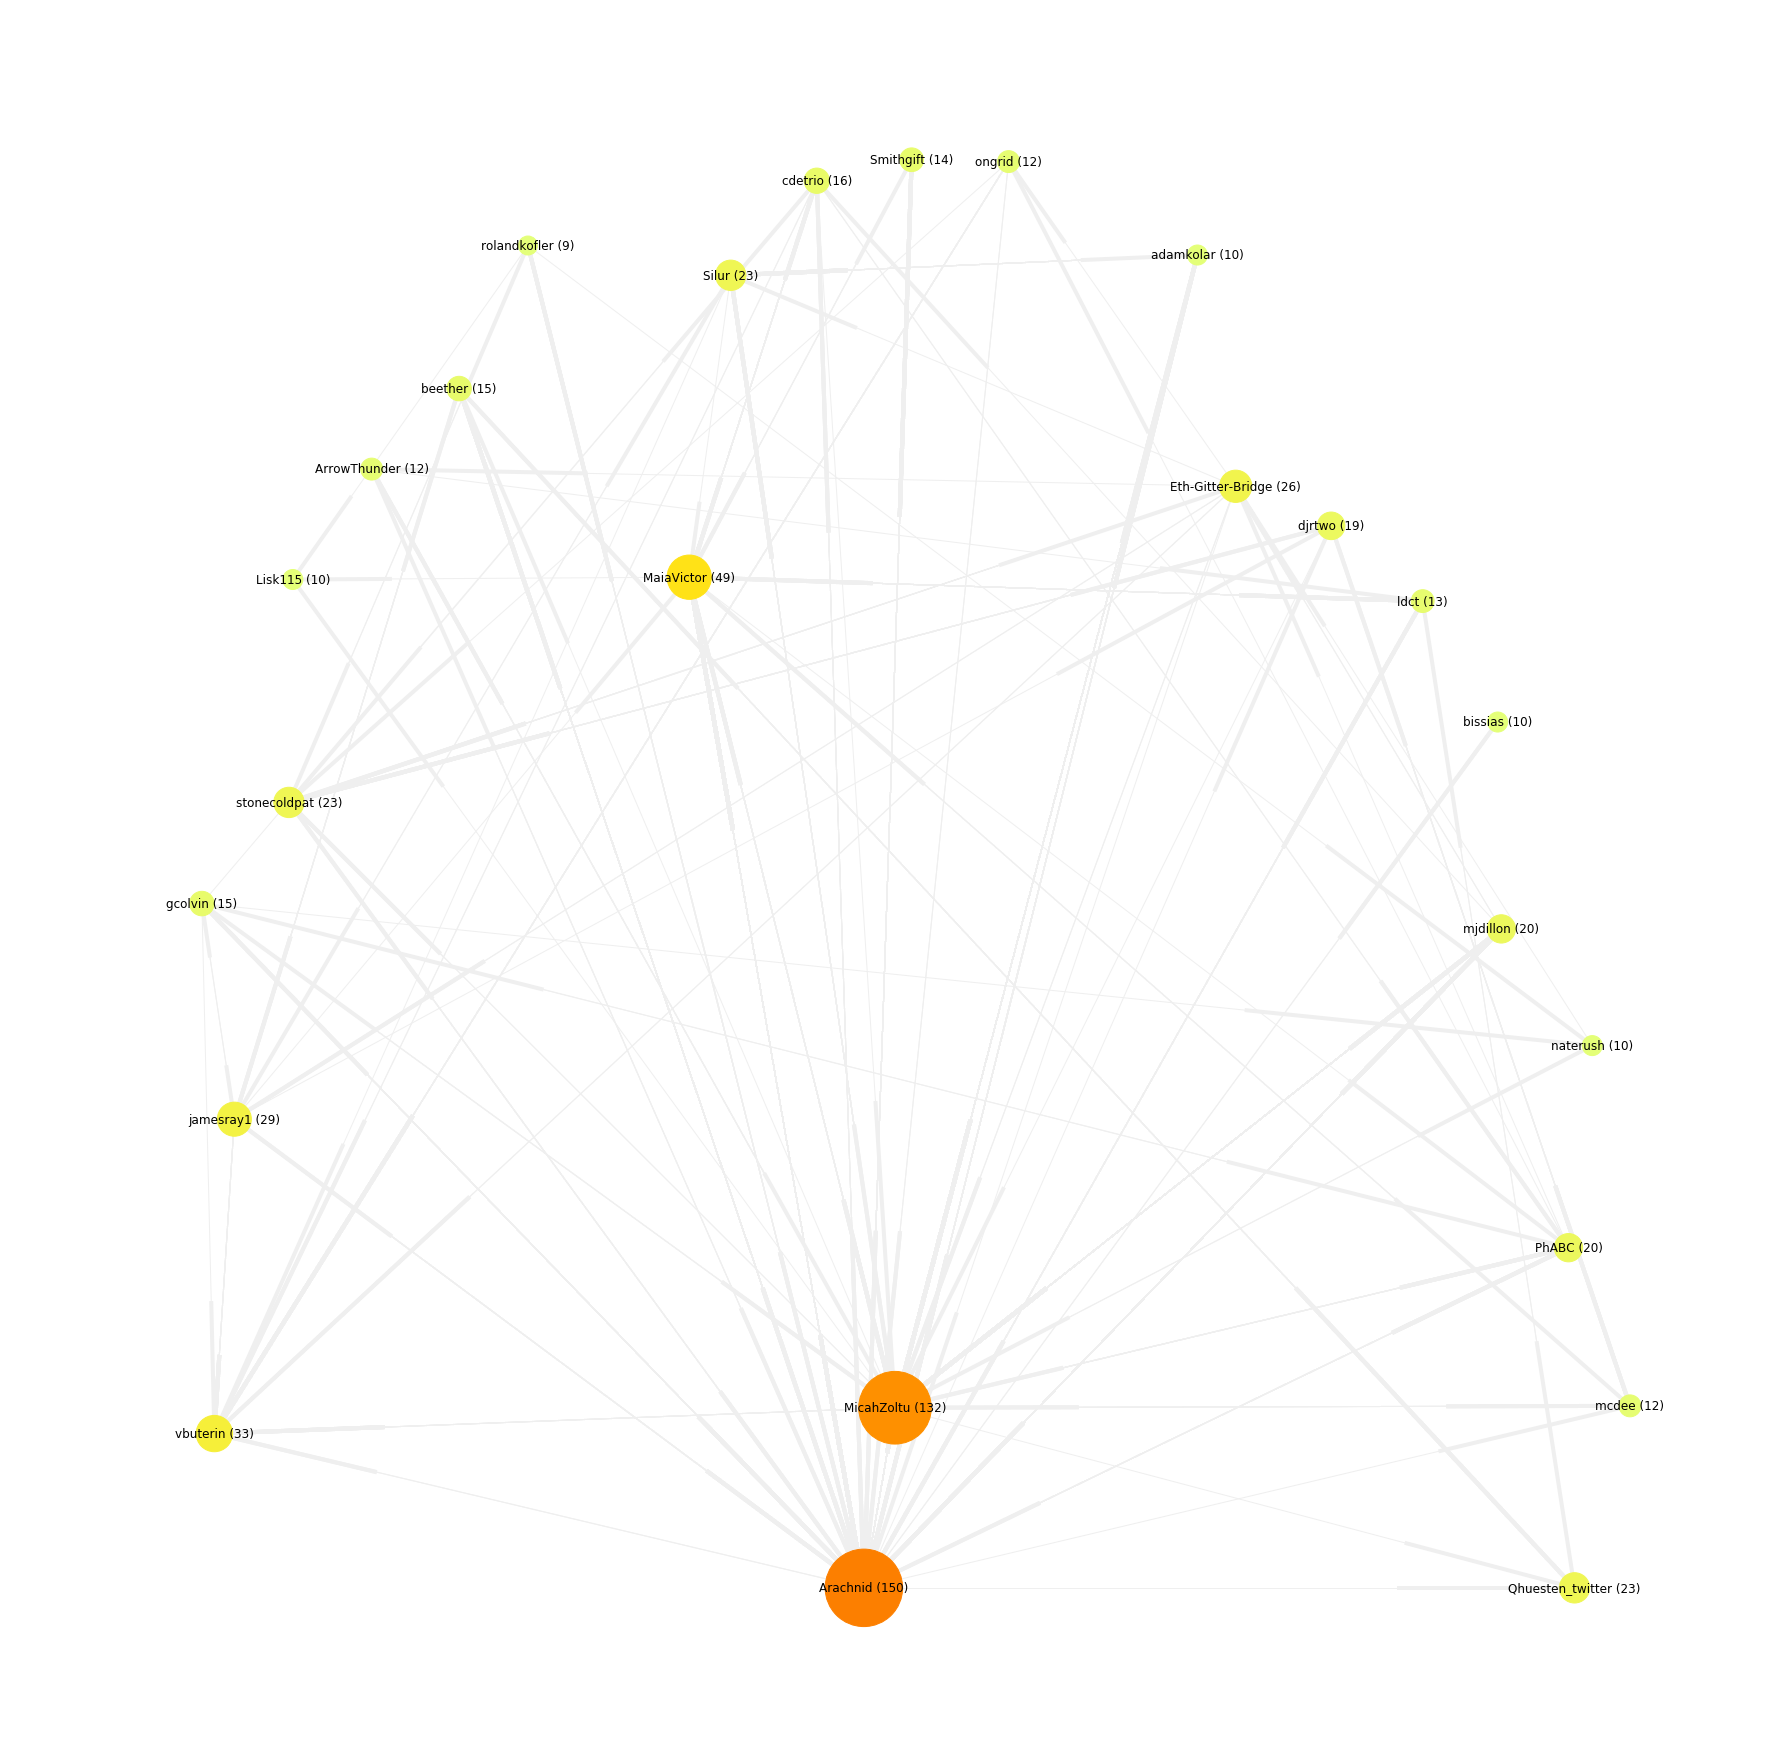

In [5]:
nodes = []
node_size = []
labels = {}
radius = 800
theta = 0
for n in G.nodes():
    if G.in_degree(n) > 8:
        nodes.append(n)
        node_size.append(G.in_degree(n)*40)
        labels[n] = "{0} ({1})".format(n,G.in_degree(n))
    #end
#end

in_degree = map(lambda x: x[1],G.in_degree(nodes))
max_in_degree = max(in_degree)

pos = {}
theta = math.pi/float(len(nodes))
for i in range(0,len(nodes)):
    n = nodes[i]
    x = (max_in_degree-G.in_degree(n))
    r = x*1000
    pos[n] = (r*math.cos(theta*i),r*math.sin(theta*i))
#end

edges = []
for e in G.edges():
    if e[0] in nodes and e[1] in nodes:
        edges.append(e)
    #end
#end

plt.figure(2,figsize=(24,24))
nx.draw(G, 
     pos=pos,
     arrowstyle='->', 
     with_labels=True, 
     labels=labels, 
     arrows=True, 
     node_size=node_size, 
     nodelist=nodes, 
     edgelist=edges,
     edge_color='#EFEFEF',
     node_color=in_degree,
     cmap=plt.cm.Wistia
)
plt.show()

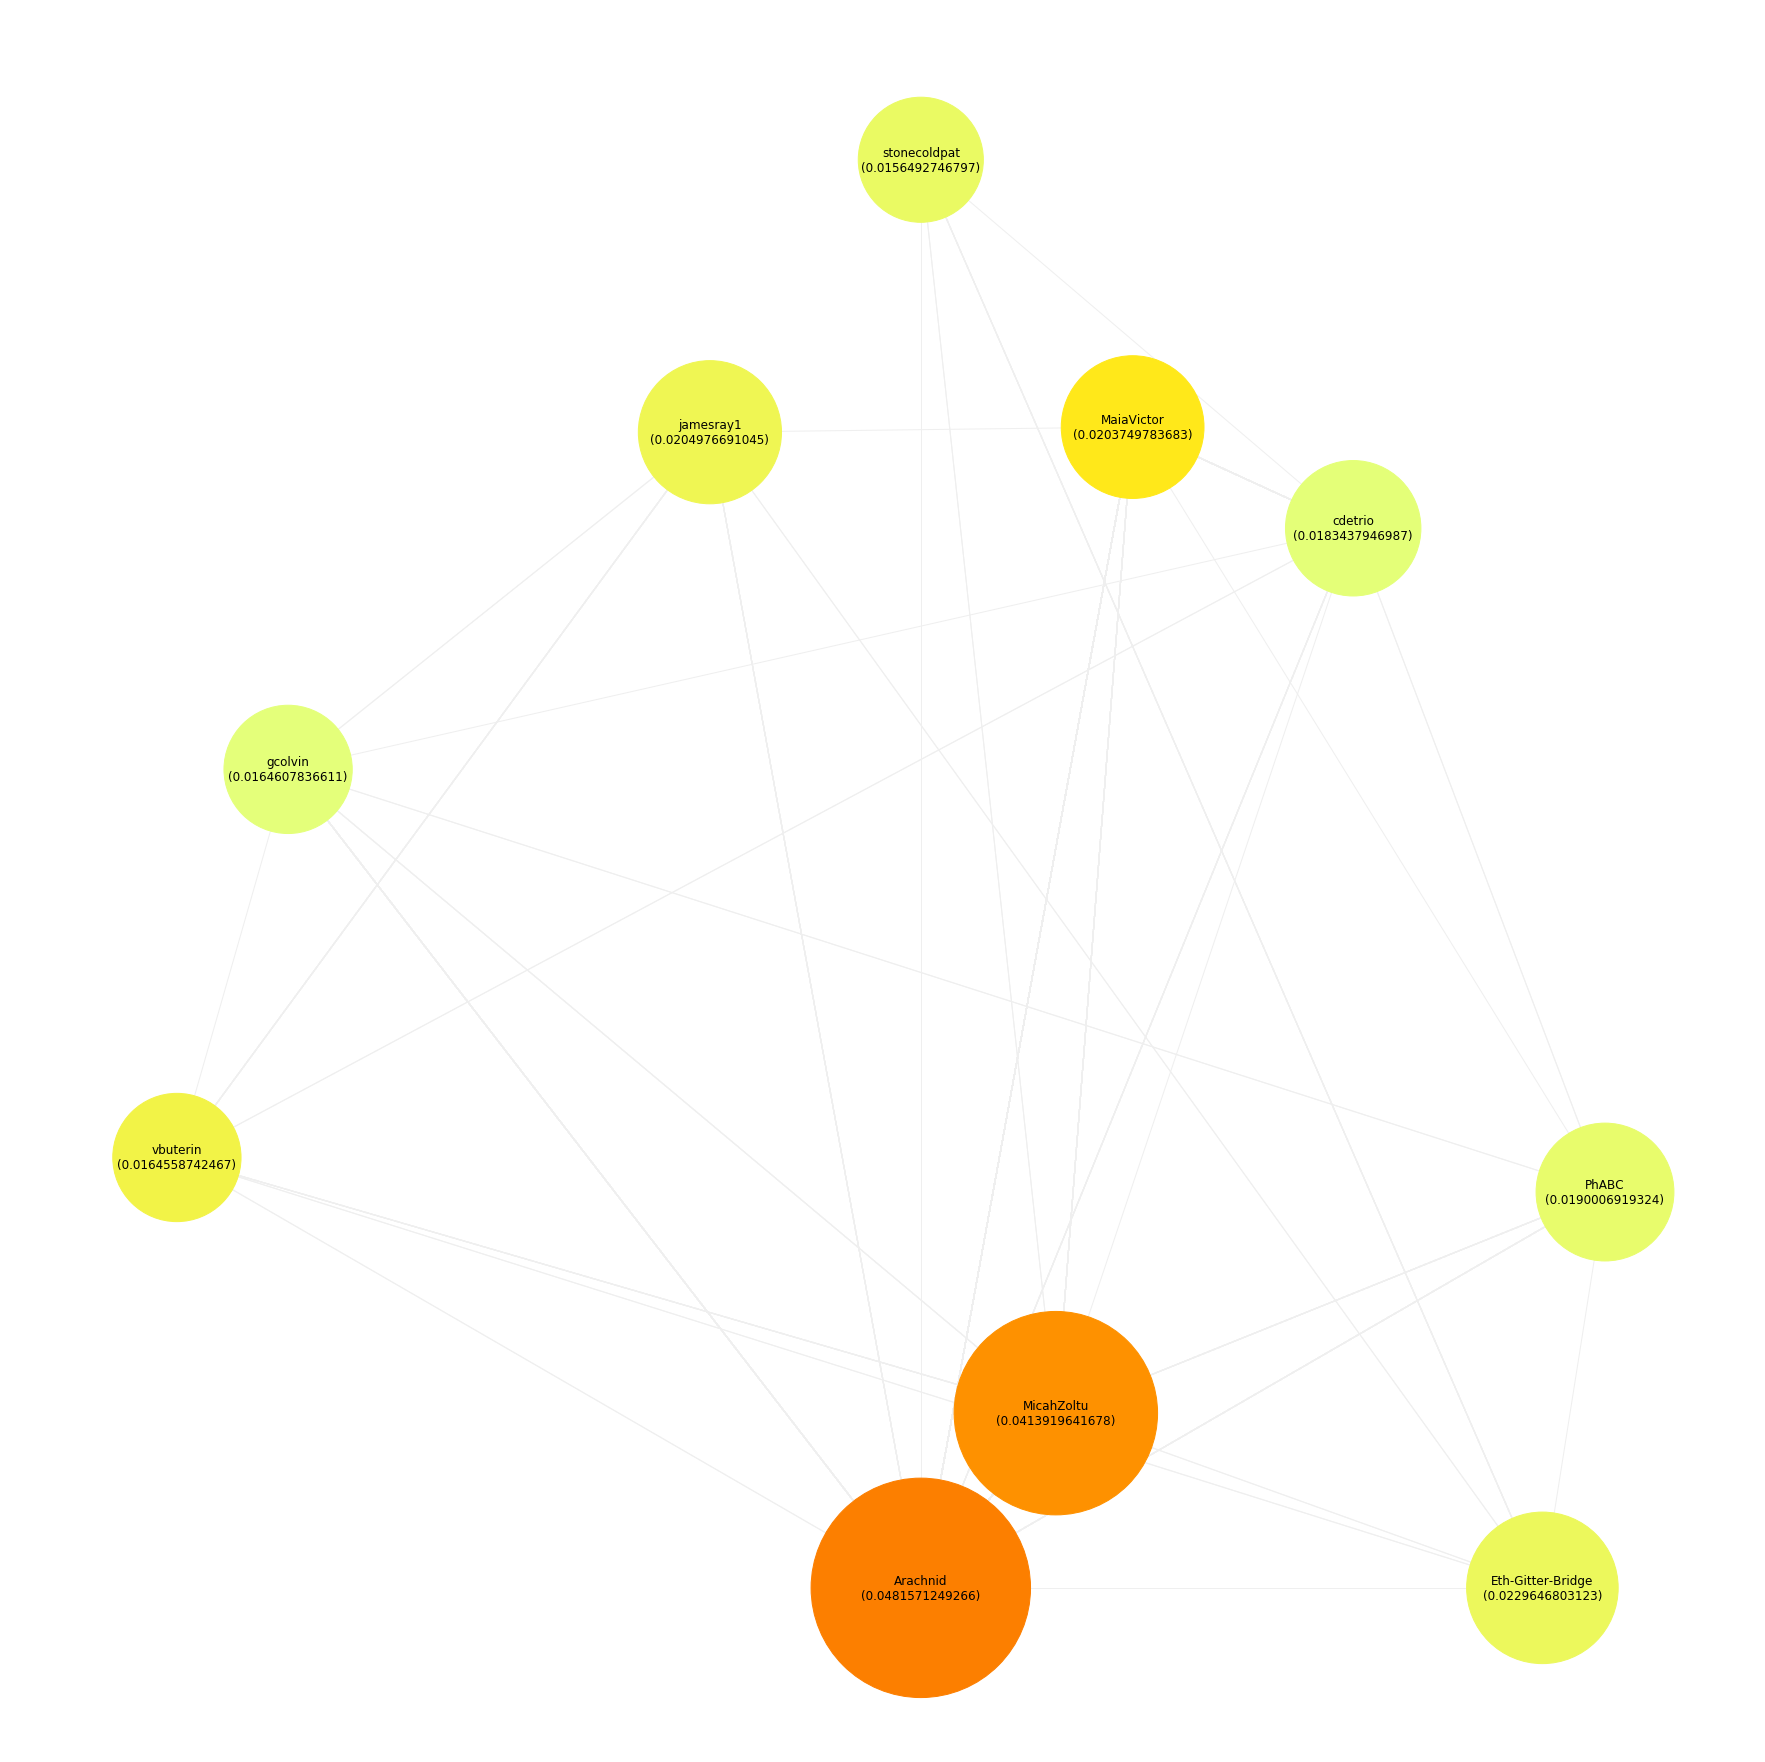

In [6]:
G2 = nx.Graph(G)
h,a = nx.hits(G2) # hits only works on a DiGraph
scores = []
for u in h.keys():
    scores.append((u,a[u],h[u]))
#end
sorted_authority = sorted(scores,key=lambda x: x[1], reverse=True)
#sorted_hub = sorted(scores,key=lambda x: x[2], reverse=True)
nodes = map(lambda x: x[0], filter(lambda x: x[1] > 0.015, scores))
labels = {}
pos = {}
theta = math.pi/float(len(nodes))
node_size = []
for i in range(0,len(nodes)):
    n = nodes[i]
    r = (sorted_authority[0][1]-a[n])*1000
    pos[n] = (r*math.cos(theta*i),r*math.sin(theta*i))
    node_size.append(a[n]*1e6)
    labels[n] = "{0}\n({1})".format(n,a[n])
#end
edges = []
for e in G.edges():
    if e[0] in nodes and e[1] in nodes:
        edges.append(e)
    #end
#end
in_degree = map(lambda x: x[1],G.in_degree(nodes))
plt.figure(3,figsize=(24,24))
nx.draw(G2,
        pos=pos,
        node_size=node_size,
        labels=labels,
        with_labels=True,
        edge_color='#EFEFEF',
        nodelist=nodes,
        edgelist=edges,
        node_color=in_degree,
        cmap=plt.cm.Wistia
    )
plt.show()